In [68]:
# https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810

In [3]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

In [5]:
def kl_divergence(p, q):
    return np.sum(np.where( p != 0, np.log(p / q) * p, 0 ))

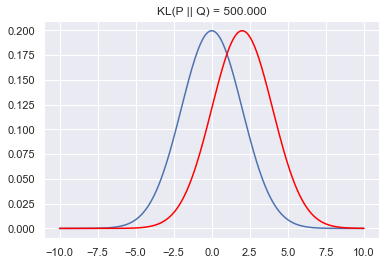

In [22]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

plt.title('KL(P || Q) = %1.3f' % (kl_divergence(p, q)))
plt.plot(x, p)
plt.plot(x, q, c='red')
plt.show()

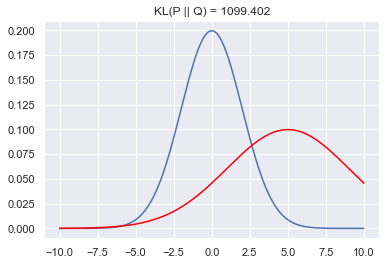

In [24]:
q = norm.pdf(x, 5, 4)
plt.title("KL(P || Q) = %1.3f" % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')
plt.show()

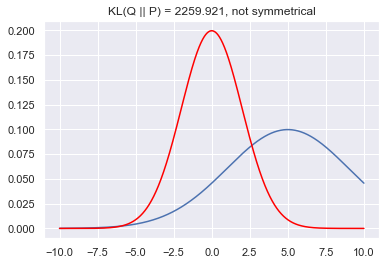

In [26]:
plt.title("KL(Q || P) = %1.3f, not symmetrical" % kl_divergence(q, p))
plt.plot(x, q)
plt.plot(x, p, c='red')
plt.show()

In [36]:
x = np.arange(-10, 10, 0.001)
p_pdf = norm.pdf(x, 0, 2).reshape(1, -1)
np.random.seed(0)
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(10, size=1)
random_pdf = norm.pdf(x, random_mean,
                      random_sigma).reshape(1, -1)

/Users/wojciechprazuch/anaconda3/envs/deeplearning/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  Parameters


In [37]:
learning_rate = 0.001
epochs = 100

In [44]:
from tensorflow.keras import Input

In [46]:
p = Input(shape=p_pdf.shape, dtype=tf.float64)
mu = tf.Variable(np.zeros(1))
sigma = tf.Variable(np.eye(1))
normal = tf.exp(-tf.square(x - mu) / (2*sigma))
q = normal / tf.reduce_sum(normal)

In [62]:
kl_divergence = tf.reduce_sum(
    tf.where(p == 0, tf.zeros(p_pdf.shape, tf.float64), 
             p * tf.math.log(p / q))
)

In [63]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

In [66]:
with tf.GradientTape(persistent=True) as tape:
    
    history = []
    means = []
    variances = []
    
    for i in range(epochs):
        gradients = tape.gradient(kl_divergence, [mu, sigma])
        

In [67]:
gradients

[None, None]